(c) 2021, Franz Ludwig Kostelezky, IMTEK chair of simulation, \<info@kostelezky.com\>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
import reconstructionutils as ru

In [3]:
# generate van-der-pol oscillator time series
dt = 0.01
T = 20 * np.pi
n = int(T / dt)
sqrtdt = np.sqrt(dt)

def f(t, x):
    '''Van-der-Pol oscillator
    '''
    epsilon = 2
    mu = 3
    kappa = 10
    y = [0, 0]
    # 1. deterministic
    y[0] = x[1]
    y[1] = epsilon * (1 - x[0] ** 2) * x[1] - mu ** 2 * x[0]
    # 2. stochastic
    y[0] += sqrtdt * np.random.randn() * kappa
    y[1] += sqrtdt * np.random.randn() * kappa
    return y

sol = solve_ivp(f, [0, T], [0, 1], dense_output=True)

t = np.linspace(0, T, n)
x, v = sol.sol(t)

<IPython.core.display.Javascript object>


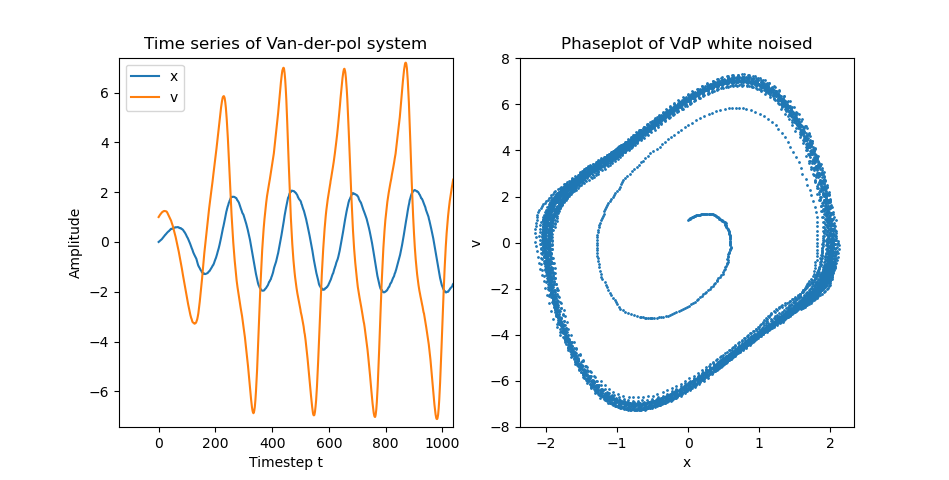

In [4]:
%matplotlib notebook
plt.subplot(121)
plt.plot(x, label='x')
plt.plot(v, label='v')
plt.title('Time series of Van-der-pol system')
plt.xlabel('Timestep t')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(122)
plt.scatter(x, v, s=1, label='phaseplot')
plt.title('Phaseplot of VdP white noised')
plt.xlabel('x')
plt.ylabel('v')

plt.show()

In [5]:
# set up time series array
series = [x, v]

In [6]:
system = ru.Model(series, 4)

In [7]:
res = system.evaluate()

no initial values defined.


c:\users\franz\appdata\local\programs\python\python38-32\lib\site-packages\scipy\integrate\odepack.py:251: ODEintWarning: Integration successful.
  warnings.warn(warning_msg, ODEintWarning)


<IPython.core.display.Javascript object>


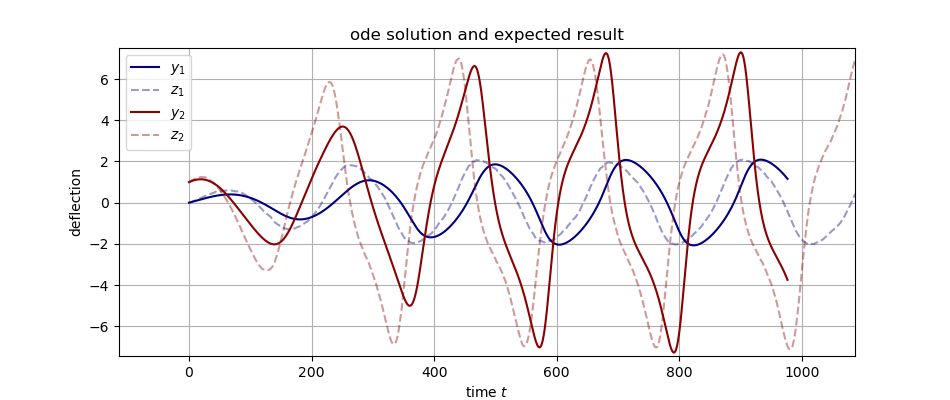

In [8]:
%matplotlib notebook
fig = plt.figure(figsize=(9.5, 4))

t = np.linspace(0, len(x), len(x) * 1024)[:1000000]

ax = fig.add_subplot(1, 1, 1)
ax.plot(t, res[:1000000,0], color='navy', label='$y_1$')
ax.plot(x, linestyle='--', color='navy', alpha=.4, label='$z_1$')
ax.plot(t, res[:1000000,1], color='darkred', label='$y_2$')
ax.plot(v, linestyle='--', color='darkred', alpha=.4, label='$z_2$')
ax.grid()
plt.legend()
plt.xlabel('time $t$')
plt.ylabel('deflection')
plt.title('ode solution and expected result')

fig.show()